# Data Loading

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path_of_file = r"C:\StockPredictionProject\data\aa.us.txt"
df = pd.read_csv(path_of_file, delimiter=',',usecols = ['Date','Open','High','Low','Close'])

In [3]:
df.head()

,Date,Open,High,Low,Close
0,1970-01-02,2.2972,2.3178,2.2972,2.2972
1,1970-01-05,2.2972,2.2972,2.2544,2.2759
2,1970-01-06,2.2759,2.2759,2.2342,2.2342
3,1970-01-07,2.2342,2.2342,2.2342,2.2342
4,1970-01-08,2.2342,2.2342,2.2139,2.2139


In [4]:
df.tail()

,Date,Open,High,Low,Close
12069,2017-11-06,47.20,47.6800,46.53,47.29
12070,2017-11-07,47.11,47.2042,46.54,46.97
12071,2017-11-08,46.73,46.7700,45.37,45.89
12072,2017-11-09,44.71,44.7100,43.11,43.33
12073,2017-11-10,42.93,44.4600,42.75,43.01


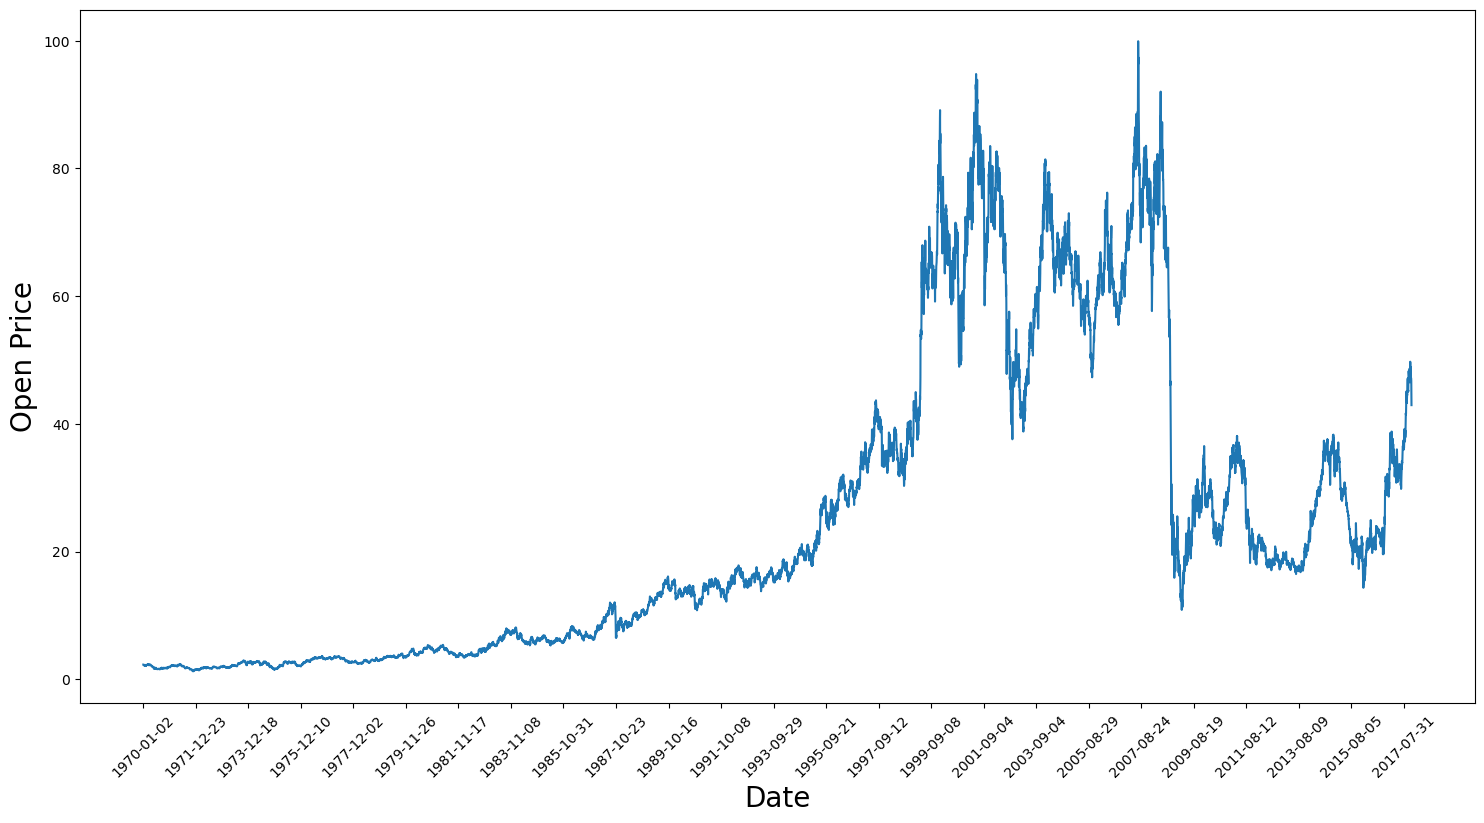

In [35]:
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),df['Open'])
plt.xticks(range(0,df.shape[0],500),df['Date'].loc[::500],rotation = 45)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Open Price',fontsize=20)
plt.show()

# Data Preparation

In [6]:
D = df.iloc[:,1:2].values
D

array([[ 2.2972],
       [ 2.2972],
       [ 2.2759],
       ...,
       [46.73  ],
       [44.71  ],
       [42.93  ]])

In [7]:
Tr_set = D[:10000]
Ts_set = D[10000:]

In [8]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [9]:
sc = MinMaxScaler(feature_range = (0,1))

In [10]:
Tr_scaled = sc.fit_transform(Tr_set)
Ts_scaled = sc.transform(Ts_set)

In [11]:
seq_len = 100
X_train = []
y_train = []
for i in range(seq_len,len(Tr_scaled)-seq_len):
    X_train.append(Tr_scaled[i-seq_len:i,0])
    y_train.append(Tr_scaled[i,0])

In [12]:
X_train,y_train = np.array(X_train),np.array(y_train)

In [13]:
X_train[0]

array([0.01058401, 0.01058401, 0.01036815, 0.00994556, 0.00994556,
       0.00973984, 0.00951892, 0.00931218, 0.00951892, 0.00931218,
       0.00951892, 0.00951892, 0.00931218, 0.00951892, 0.00994556,
       0.01015027, 0.00951892, 0.00931218, 0.00888148, 0.00888148,
       0.008467  , 0.00867475, 0.00867475, 0.00910038, 0.00888148,
       0.00867475, 0.00888148, 0.00910038, 0.00888148, 0.00973984,
       0.00951892, 0.00951892, 0.00951892, 0.00951892, 0.00973984,
       0.01015027, 0.01015027, 0.01015027, 0.01036815, 0.01100356,
       0.01121029, 0.01121029, 0.01100356, 0.01121029, 0.01142209,
       0.01121029, 0.01121029, 0.01100356, 0.01100356, 0.01079277,
       0.01058401, 0.01036815, 0.01015027, 0.01015027, 0.00951892,
       0.00931218, 0.00951892, 0.00973984, 0.01058401, 0.01036815,
       0.01036815, 0.01058401, 0.01058401, 0.01079277, 0.01079277,
       0.01058401, 0.01058401, 0.01058401, 0.01036815, 0.01015027,
       0.01015027, 0.00994556, 0.00973984, 0.00951892, 0.00931

In [14]:
X_test = []
y_test = []
for i in range(seq_len,len(Ts_scaled)-seq_len):
    X_test.append(Ts_scaled[i-seq_len:i,0])
    y_test.append(Ts_scaled[i,0])

In [15]:
X_test,y_test = np.array(X_test),np.array(y_test)

In [16]:
X_test.shape

(1874, 100)

In [17]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [18]:
X_train.shape

(9800, 100, 1)

In [19]:
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [20]:
X_test.shape

(1874, 100, 1)

In [21]:
y_test.shape

(1874,)

# Model Buiding

In [22]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,
              input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.1))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(tf.keras.layers.GRU(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

C:\Users\sanuk\New folder\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Model Training

In [23]:
model.compile(optimizer='adam',loss=tf.keras.losses.mse)

In [24]:
model.fit(X_train,y_train,epochs=5,batch_size=32)

Epoch 1/5
307/307 ━━━━━━━━━━━━━━━━━━━━ 70s 198ms/step - loss: 0.0110
Epoch 2/5
307/307 ━━━━━━━━━━━━━━━━━━━━ 80s 191ms/step - loss: 0.0016
Epoch 3/5
307/307 ━━━━━━━━━━━━━━━━━━━━ 62s 201ms/step - loss: 0.0014
Epoch 4/5
307/307 ━━━━━━━━━━━━━━━━━━━━ 63s 205ms/step - loss: 0.0012
Epoch 5/5
307/307 ━━━━━━━━━━━━━━━━━━━━ 79s 196ms/step - loss: 0.0011


# Model Testing

In [25]:
y_hat = model.predict(X_test)

59/59 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step


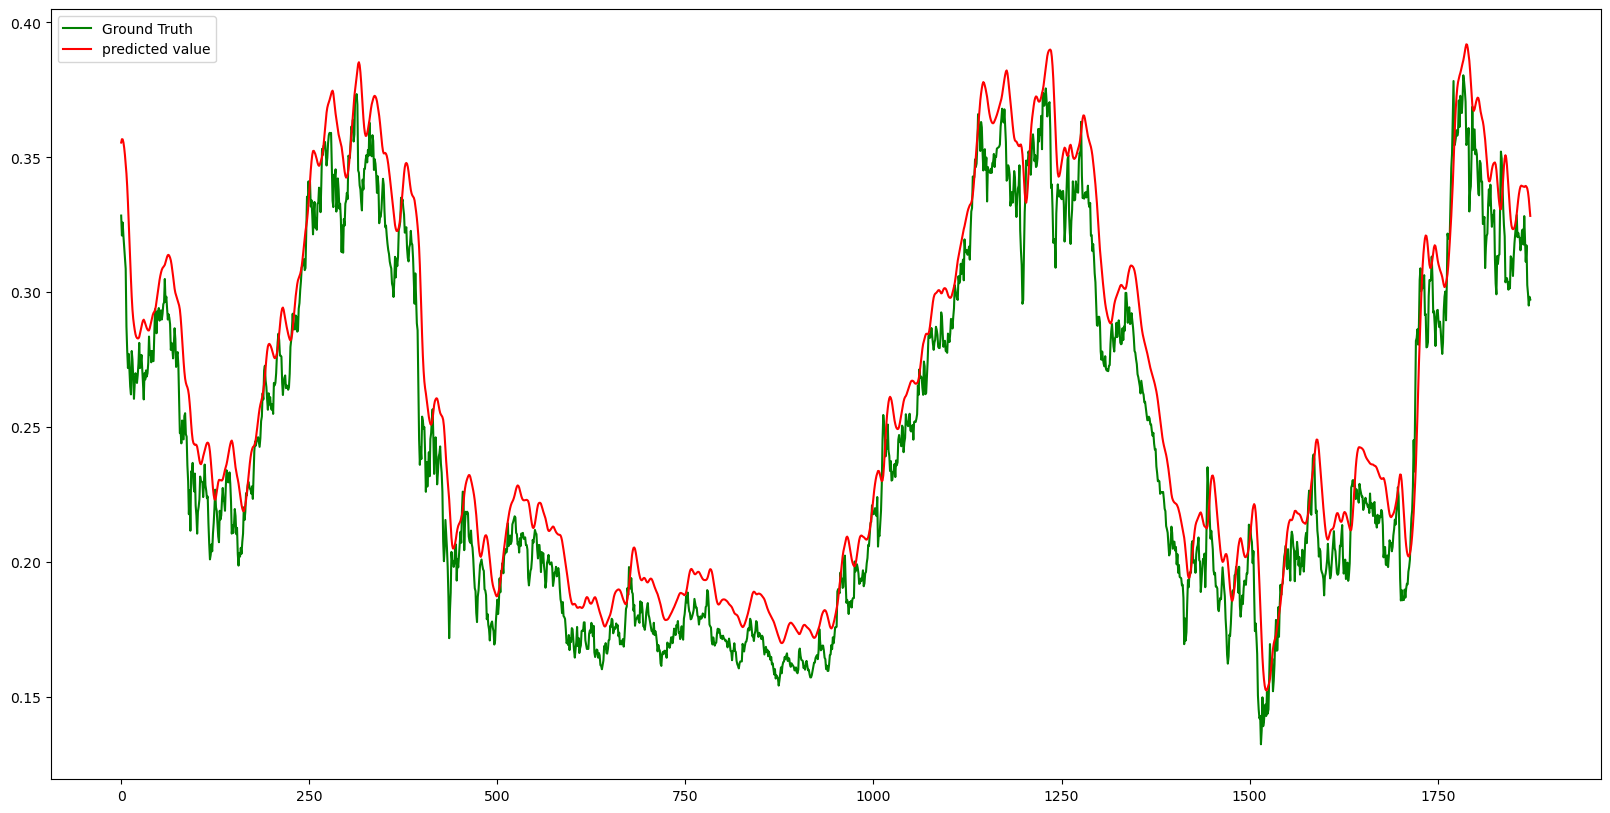

In [26]:
plt.figure(figsize=(20,10))
plt.plot(y_test,color='green',label='Ground Truth')
plt.plot(y_hat,color='red',label='predicted value')
plt.legend()
plt.show()

# Function to predict value of any column

In [27]:
def create_array (column_index):
    D = df.iloc[:,column_index:column_index + 1].values
    return D
    

In [28]:
create_array(2)

array([[ 2.3178],
       [ 2.2972],
       [ 2.2759],
       ...,
       [46.77  ],
       [44.71  ],
       [44.46  ]])

In [29]:
def create_TrainAndTest_DataSet (column_index):
    D = create_array (column_index)
    Tr_set = D[:10000]
    Ts_set = D[10000:]
    from sklearn.preprocessing import MinMaxScaler
    import tensorflow as tf
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense
    from tensorflow.keras.layers import LSTM
    from tensorflow.keras.layers import Dropout
    sc = MinMaxScaler(feature_range = (0,1))
    Tr_scaled = sc.fit_transform(Tr_set)
    Ts_scaled = sc.transform(Ts_set)
    seq_len = 100
    X_train = []
    y_train = []
    for i in range(seq_len,len(Tr_scaled)-seq_len):
        X_train.append(Tr_scaled[i-seq_len:i,0])
        y_train.append(Tr_scaled[i,0])
    X_test = []
    y_test = []
    for i in range(seq_len,len(Ts_scaled)-seq_len):
        X_test.append(Ts_scaled[i-seq_len:i,0])
        y_test.append(Ts_scaled[i,0])
    X_train,y_train = np.array(X_train),np.array(y_train)
    X_test,y_test = np.array(X_test),np.array(y_test)
    X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
    X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
    return np.array([X_train, y_train, X_test, y_test],dtype = object) 

In [30]:
create_TrainAndTest_DataSet(1)[0].shape

(9800, 100, 1)

In [31]:
def model(column_index):
    create_TrainAndTest_DataSet(column_index)
    model = Sequential()
    model.add(LSTM(units=50,return_sequences=True,
                  input_shape=(create_TrainAndTest_DataSet(column_index)[0].shape[1],1)))
    model.add(Dropout(0.1))
    model.add(LSTM(units=50,return_sequences=True))
    model.add(Dropout(0.2))
    model.add(tf.keras.layers.GRU(units=50))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    
    model.compile(optimizer='adam',loss=tf.keras.losses.mse)
    
    model.fit(create_TrainAndTest_DataSet(column_index)[0],create_TrainAndTest_DataSet(column_index)[1],epochs=5,batch_size=32)
    
    y_hat = model.predict(create_TrainAndTest_DataSet(column_index)[2])
    
    return create_TrainAndTest_DataSet(column_index)[3], y_hat
    

In [37]:
 model(2)
    
   
    

C:\Users\sanuk\New folder\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
307/307 ━━━━━━━━━━━━━━━━━━━━ 71s 198ms/step - loss: 0.0105
Epoch 2/5
307/307 ━━━━━━━━━━━━━━━━━━━━ 62s 201ms/step - loss: 0.0014
Epoch 3/5
307/307 ━━━━━━━━━━━━━━━━━━━━ 86s 212ms/step - loss: 0.0012
Epoch 4/5
307/307 ━━━━━━━━━━━━━━━━━━━━ 80s 206ms/step - loss: 0.0012
Epoch 5/5
307/307 ━━━━━━━━━━━━━━━━━━━━ 62s 202ms/step - loss: 9.6750e-04
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step


(array([0.32478343, 0.31934319, 0.32166052, ..., 0.29863646, 0.29659761,
        0.29157508]),
 array([[0.3193817 ],
        [0.32045424],
        [0.32008085],
        ...,
        [0.29823685],
        [0.2951482 ],
        [0.2919237 ]], dtype=float32))

C:\Users\sanuk\New folder\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
307/307 ━━━━━━━━━━━━━━━━━━━━ 79s 233ms/step - loss: 0.0098
Epoch 2/5
307/307 ━━━━━━━━━━━━━━━━━━━━ 73s 237ms/step - loss: 0.0014
Epoch 3/5
307/307 ━━━━━━━━━━━━━━━━━━━━ 77s 220ms/step - loss: 0.0011
Epoch 4/5
307/307 ━━━━━━━━━━━━━━━━━━━━ 76s 199ms/step - loss: 0.0010
Epoch 5/5
307/307 ━━━━━━━━━━━━━━━━━━━━ 64s 208ms/step - loss: 9.6420e-04
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step


C:\Users\sanuk\New folder\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
307/307 ━━━━━━━━━━━━━━━━━━━━ 69s 195ms/step - loss: 0.0099
Epoch 2/5
307/307 ━━━━━━━━━━━━━━━━━━━━ 82s 195ms/step - loss: 0.0015
Epoch 3/5
307/307 ━━━━━━━━━━━━━━━━━━━━ 63s 205ms/step - loss: 0.0012
Epoch 4/5
307/307 ━━━━━━━━━━━━━━━━━━━━ 84s 208ms/step - loss: 0.0011
Epoch 5/5
307/307 ━━━━━━━━━━━━━━━━━━━━ 77s 190ms/step - loss: 0.0010
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step


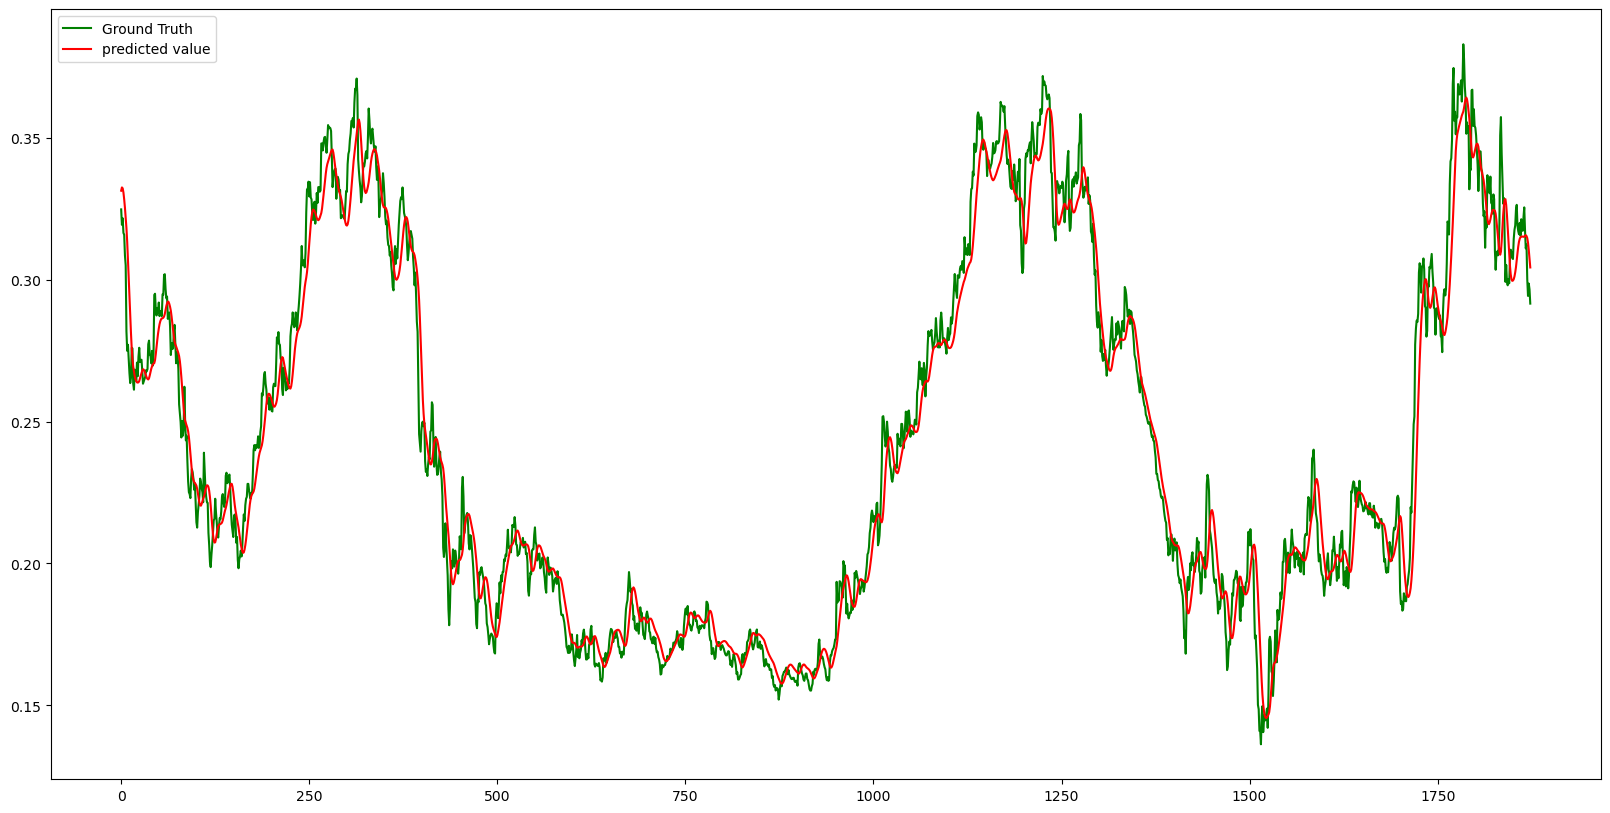

In [40]:
plt.figure(figsize=(20,10))
plt.plot(model(2)[0],color='green',label='Ground Truth')
plt.plot(model(2)[1],color='red',label='predicted value')
plt.legend()
plt.show()
    